# Expt 11: THF -0.8V

- 218386: OCV
- 218389: tNR -0.1 to -0.8 V
- 218393: -0.8 V steady state
- 218396: tNR return to OCV
- 218397: Final OCV



In [2]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/TrON'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

#from tron.bayesian_analysis import summary_plots

"M0 z","M0 rho 68 percent lower","M0 rho 68 percent upper","M0 rho 95 percent lower","M0 rho 95 percent upper","M0 rho best","M1 z","M1 rho 68 percent lower","M1 rho 68 percent upper","M1 rho 95 percent lower","M1 rho
 95 percent upper","M1 rho best","M2 z","M2 rho 68 percent lower","M2 rho 68 percent upper","M2 rho 95 percent lower","M2 rho 95 percent upper","M2 rho best"


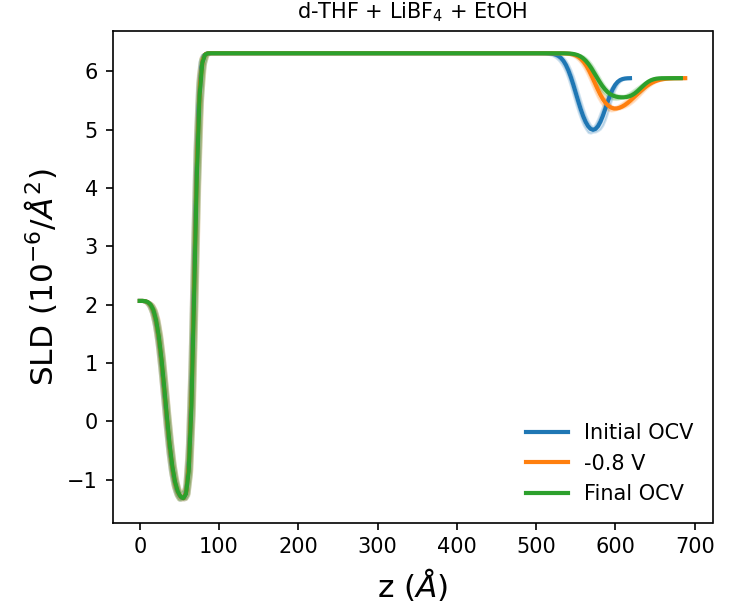

In [35]:
results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/")


def plot_sld(idx_offset, data, label, z_offset=0, color=None):
    z_id = idx_offset
    sld_low_id = idx_offset + 1
    sld_high_id = idx_offset + 2
    sld_best_id = idx_offset + 5

    z = data[z_id]
    best = data[sld_best_id]
    low = data[sld_low_id]
    high = data[sld_high_id]

    _z = z[-1] - z + z_offset
    plt.plot(
        _z,
        best,
        markersize=4,
        label=label,
        linewidth=2,
    )
    plt.fill_between(
        _z,
        low,
        high,
        alpha=0.2,
        color=plt.gca().lines[-1].get_color(),
    )


data = np.genfromtxt(os.path.join(results_dir, "expt11-contours.csv"), delimiter=",").T

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

plot_sld(0, data, "Initial OCV", z_offset=0)
plot_sld(6, data, "-0.8 V", z_offset=0)
plot_sld(12, data, "Final OCV", z_offset=0)

plt.xlabel("z ($\AA$)", fontsize=15)
plt.ylabel("SLD ($10^{-6}/{\AA}^2$)", fontsize=15)
plt.title("d-THF + LiBF$_4$ + EtOH", fontsize=10)
plt.legend(frameon=False)
plt.savefig("expt11-all-corefine.svg")


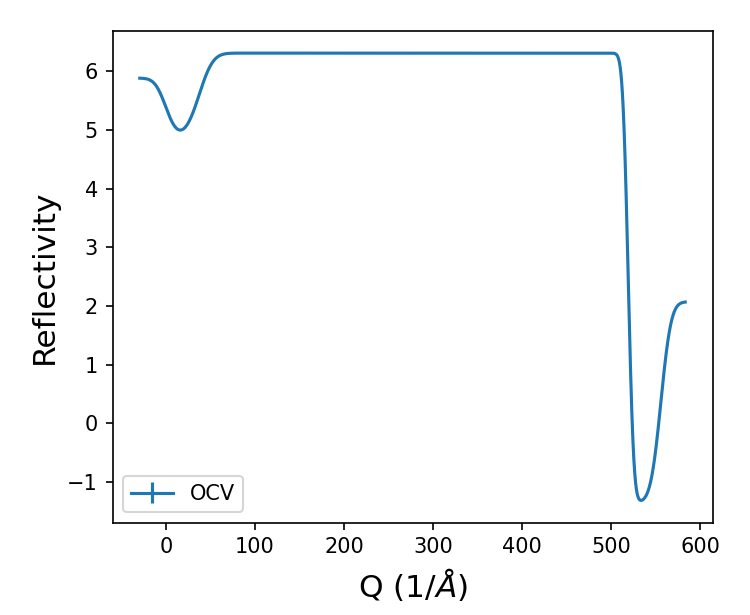

In [6]:
results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/expt11-all-corefine")


data1 = np.loadtxt(os.path.join(results_dir, "Cu-THF-corefine-expt11-1-profile.dat")).T


fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

plt.errorbar(data1[0], data1[1], yerr=data1[2], label="OCV")
#plt.errorbar(data2[0], data2[1], yerr=data2[2], label=file_list[6])
#plt.errorbar(data3[0], data3[1], yerr=data3[2], label=file_list[-4])
#plt.errorbar(data4[0], data4[1], yerr=data4[2], label=file_list[idx2])

plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.legend()



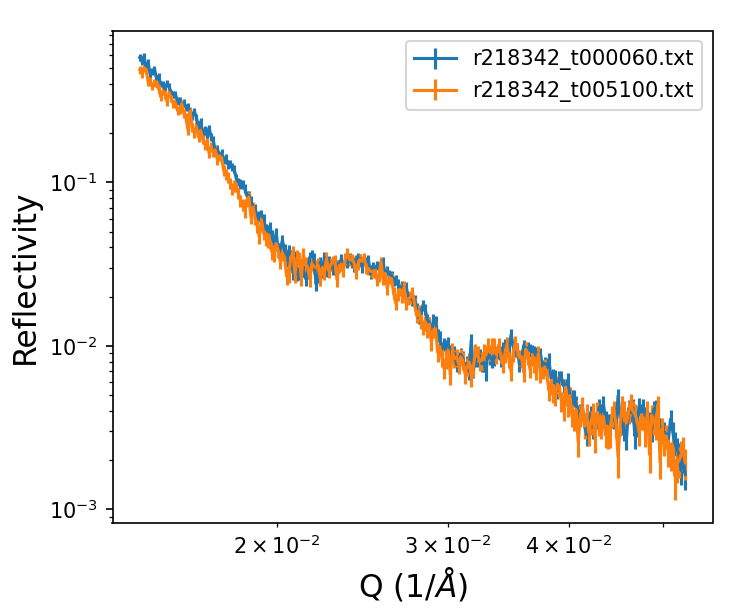

In [82]:
file_list = sorted(os.listdir(data_dir))

idx1 = 2
idx2 = -1

data1 = np.loadtxt(os.path.join(data_dir, file_list[idx1])).T

data2 = np.loadtxt(os.path.join(data_dir, file_list[7])).T

data3 = np.loadtxt(os.path.join(data_dir, file_list[-4])).T

data4 = np.loadtxt(os.path.join(data_dir, file_list[idx2])).T

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

plt.errorbar(data1[0], data1[1], yerr=data1[2], label=file_list[idx1])
#plt.errorbar(data2[0], data2[1], yerr=data2[2], label=file_list[6])
#plt.errorbar(data3[0], data3[1], yerr=data3[2], label=file_list[-4])
plt.errorbar(data4[0], data4[1], yerr=data4[2], label=file_list[idx2])

plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.legend()
plt.yscale('log')
plt.xscale('log')

## Summary of steady state data

Could not find /SNS/REF_L/IPTS-34347/shared/first-cell-tNR/dyn-fitting/207161/__model-profile.dat
Could not find /SNS/REF_L/IPTS-34347/shared/first-cell-tNR/dyn-fitting/207169/__model-profile.dat


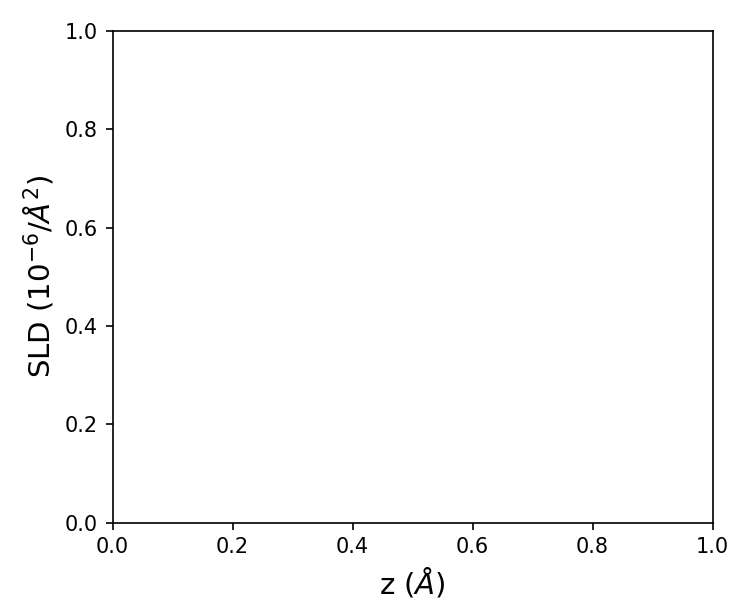

In [61]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

init_r = os.path.join(dyn_model_dir, "207161", "__model-profile.dat")
final_r = os.path.join(dyn_model_dir, "207169", "__model-profile.dat")
summary_plots.plot_sld(init_r, "207161: Pre cycle 1", show_cl=False)
summary_plots.plot_sld(final_r, "207169: Post cycle 1", show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


731


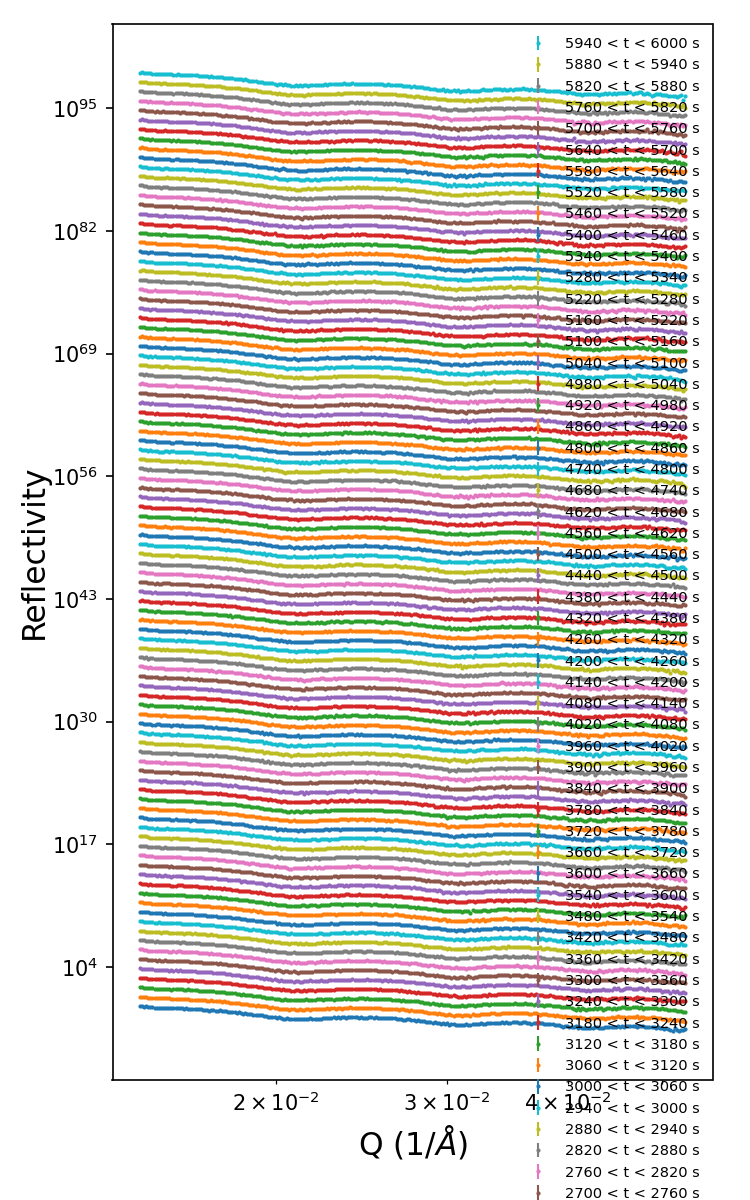

In [22]:
importlib.reload(summary_plots)

init_state = os.path.join(project_dir, 'dyn-fitting', '207161', '__model-refl.dat') 
final_state = os.path.join(project_dir, 'dyn-fitting', '207169', '__model-refl.dat')

file_list = summary_plots.plot_dyn_data(dynamic_run, init_state, final_state, first_index=0, last_index=100, model_name='model-loop-207168',
                                        dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir)

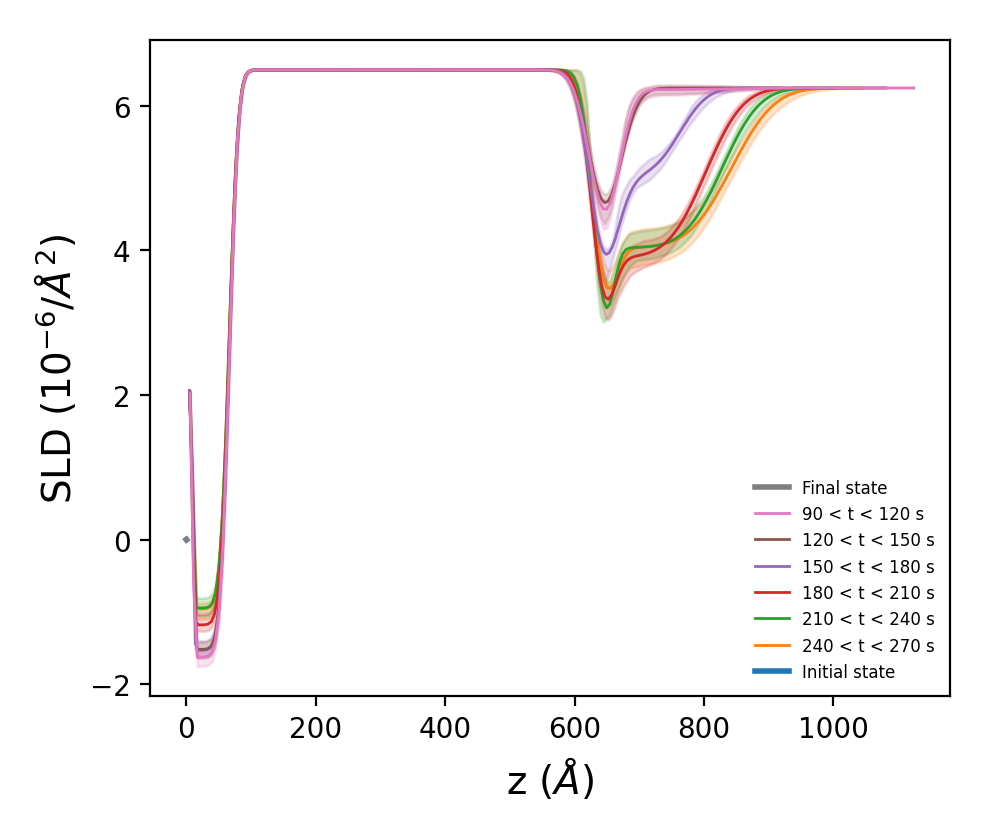

In [14]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207168.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, init_state, final_state, 
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=True, model_name='model-loop-207168')

THF interface 29.767315099895264
material interface 18.6680172612351
material rho 3.690244438447533
material thickness 33.21387416625166
Ti rho -1.9982523408587178


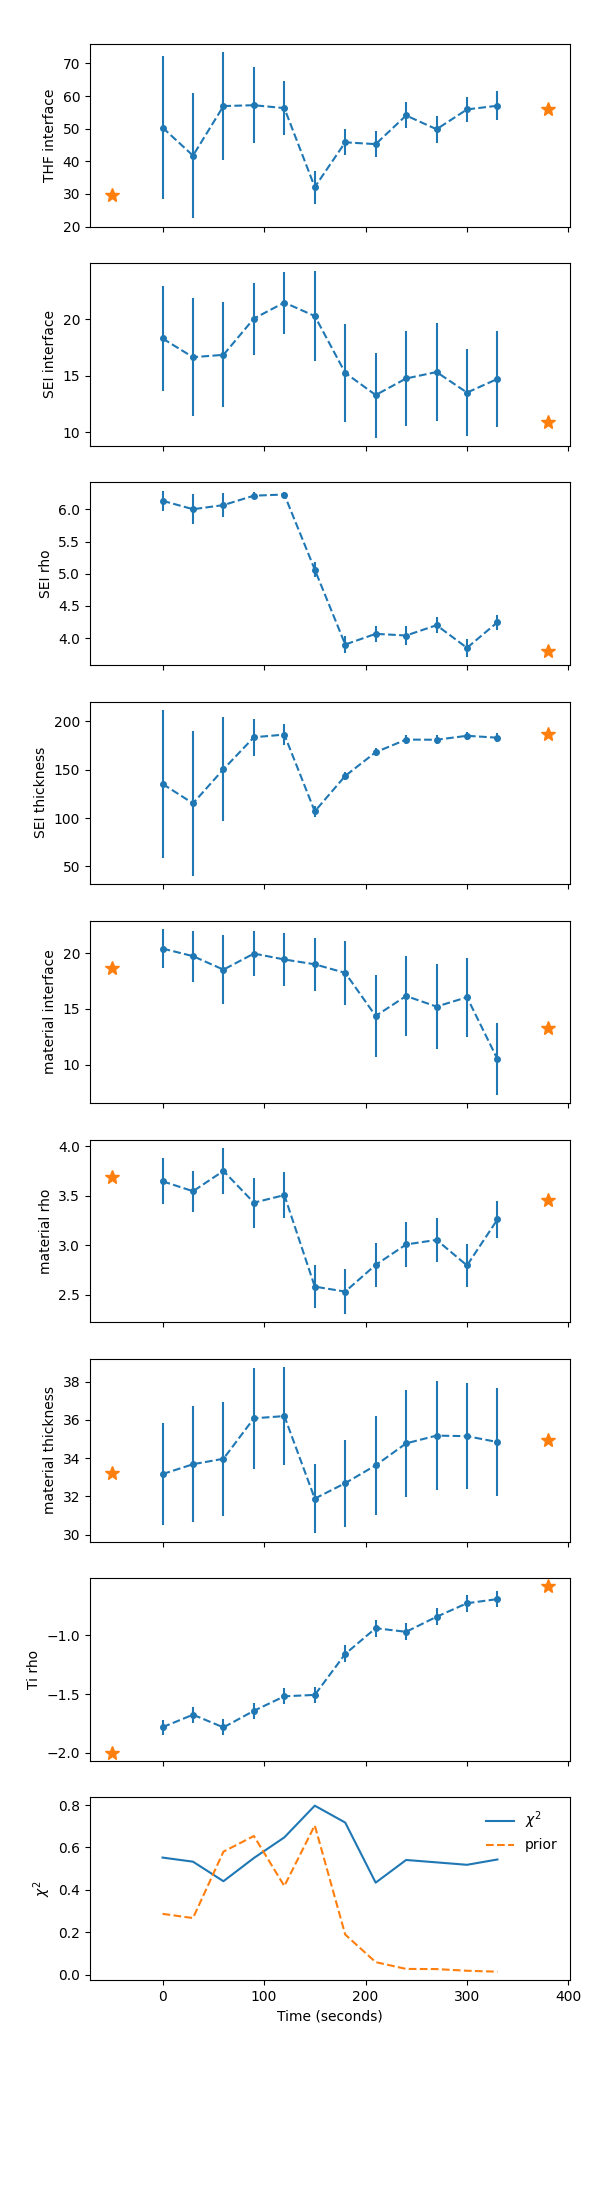

In [15]:
importlib.reload(summary_plots)

initial_state = 207161
trend_values, trend_err = summary_plots.trend_data(file_list, initial_state, 207169, 
                                                   fit_dir=dyn_model_dir, dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207168', model_file=None, add_plot=0)


In [18]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207168.json')
summary_plots.write_md_table(trend_file)